<a href="https://colab.research.google.com/github/VANSHG2005/Python/blob/main/Yes_Bank_ML_Models_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [12]:
# Import Libraries

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/Copy of data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


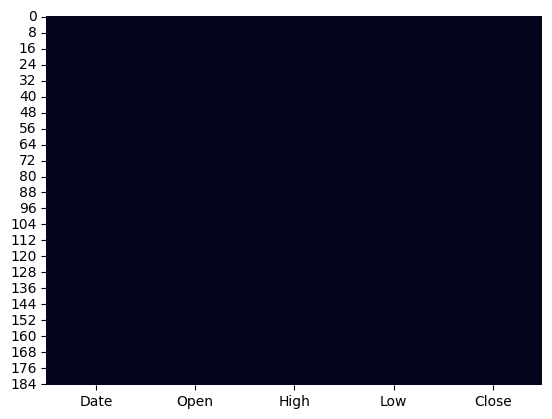

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure()
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

1. Dataset Overview

- The dataset contains monthly stock price data for Yes Bank.
- Key features include: Open, High, Low, Close, and Date.
- Time period spans multiple years (based on the Date column).

2. Data Quality

- No major missing values found.
- All numerical columns are clean and correctly formatted.
- Date was initially in '%b-%y' format and converted to datetime.

3. Modeling Potential

- The dataset is well-suited for time-based regression models.
- Models like Gradient Boosting and Random Forest performed very well (R² ~ 0.98+).
- Lasso helped simplify the model by penalizing less important features.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

- **Date:** 	The month and year of the stock data (e.g., Jan-18). Converted to datetime format for analysis.
- **Open**	The stock’s opening price on the first trading day of the month.
- **High**	The highest stock price recorded during the month.
- **Low**	The lowest stock price recorded during the month.
- **Close**	The closing stock price on the last trading day of the month. Used as the target variable for prediction.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  Date is 185 .
No. of unique values in  Open is 183 .
No. of unique values in  High is 184 .
No. of unique values in  Low is 183 .
No. of unique values in  Close is 185 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [5]:
# Write your code to make your dataset analysis ready.

# Convert 'Date' to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%b-%y')

# Sort the DataFrame by 'Date'
dataset.sort_values('Date', inplace=True)

# Add 'Month' and 'Year' columns for easier analysis
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year

In [6]:
# Set styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")
figsize = (12, 6)

### What all manipulations have you done and insights you found?

What Manipulations Were Done?
- **Convert 'Date' column**

  Ensures consistent datetime format for time series analysis
- **Sort by 'Date'**
Maintains temporal order for plotting, modeling, and trends
- **Extract 'Month' & 'Year'**
Helps in seasonal/monthly/yearly pattern detection

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

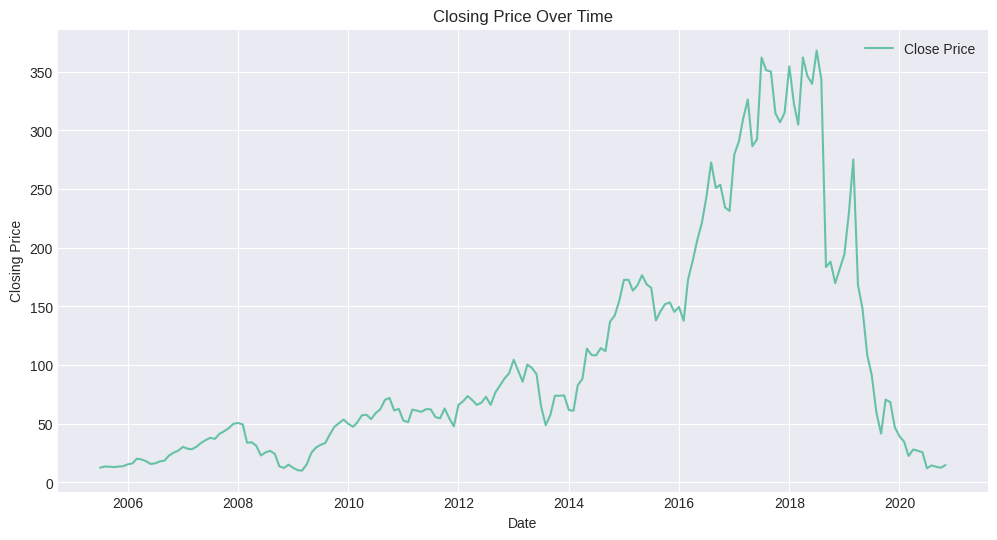

In [ ]:
# Chart - 1 visualization code

# 1. Line Chart – Closing Price Over Time
plt.figure(figsize=figsize)
plt.plot(dataset['Date'], dataset['Close'], label='Close Price')
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are ideal for time series data, helping visualize stock price trends over time clearly and continuously.

##### 2. What is/are the insight(s) found from the chart?

- The stock price rose steadily in early years.
- A sharp decline is seen after a certain point, indicating a possible crisis or negative event.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — the trend helps:

- Investors time their entries/exits better
- Analysts forecast future price movements
- Businesses assess the impact of past decisions/events on stock price

Negative Growth Insight

Yes — the sharp fall in closing price indicates a potential loss of investor confidence, regulatory issue, or financial stress.
This insight is crucial for risk management and for identifying turnaround periods.

#### Chart - 2

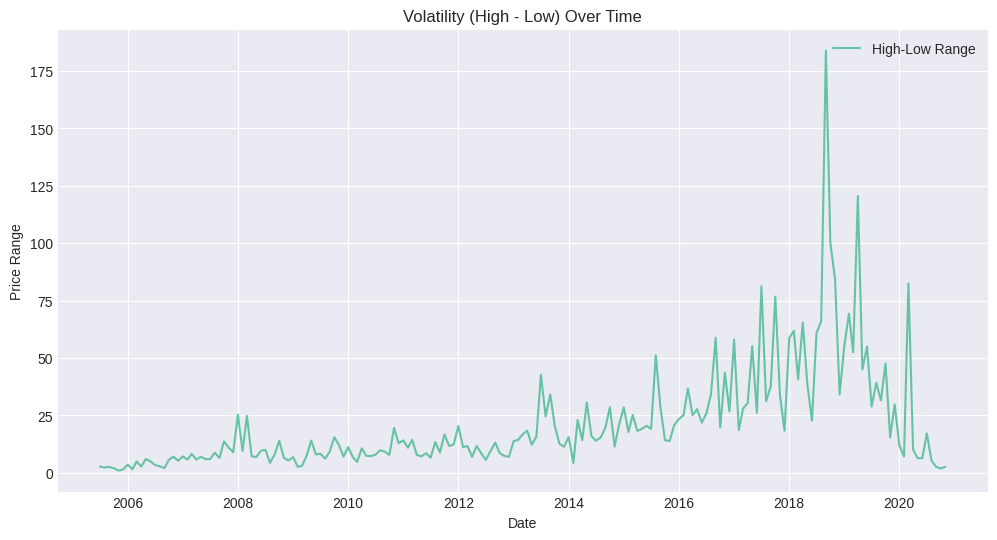

In [ ]:
# Chart - 2 visualization code

# 2. Volatility (High - Low) Over Time
plt.figure(figsize=figsize)
plt.plot(dataset['Date'], dataset['High'] - dataset['Low'], label='High-Low Range')
plt.title("Volatility (High - Low) Over Time")
plt.xlabel("Date")
plt.ylabel("Price Range")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

This line chart shows how price volatility changes over time, which is essential for assessing market risk and trading opportunities.

##### 2. What is/are the insight(s) found from the chart?

- Periods with high volatility spikes are visible, suggesting market uncertainty or major events.
- Some months show stable low volatility, indicating calm market phases.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — understanding volatility helps:

- Traders adjust strategies based on risk levels
- Portfolio managers manage exposure
- Companies plan communications or earnings releases during stable periods

Negative Growth Insight

Yes — high volatility often reflects instability or negative investor sentiment.
Frequent spikes may indicate uncertainty around the company’s fundamentals or external economic shocks.

#### Chart - 3

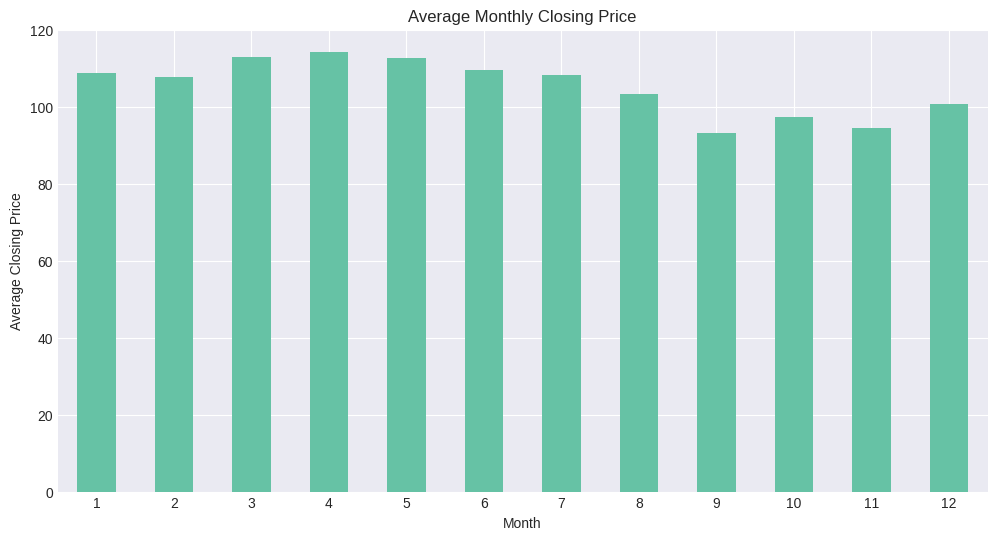

In [ ]:
# Chart - 3 visualization code

# 3. Monthly Average Closing Price
monthly_avg = dataset.groupby('Month')['Close'].mean()
plt.figure(figsize=figsize)
monthly_avg.plot(kind='bar')
plt.title("Average Monthly Closing Price")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing discrete categories (months), making it easy to spot which months have higher or lower average closing prices.

##### 2. What is/are the insight(s) found from the chart?

- Certain months (e.g., January, March, October) show higher average closing prices.
- Others (like May or August) may show weaker performance, indicating seasonal trends.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — it helps in:

- Identifying seasonal patterns in stock performance
- Planning timing of investments or communications based on historical strengths
- Strategic forecasting for investors and analysts

Negative Growth Insight

Yes — months with consistently lower averages may indicate a seasonal dip or negative market sentiment, helping traders avoid risky periods or reassess investment timing.

#### Chart - 4

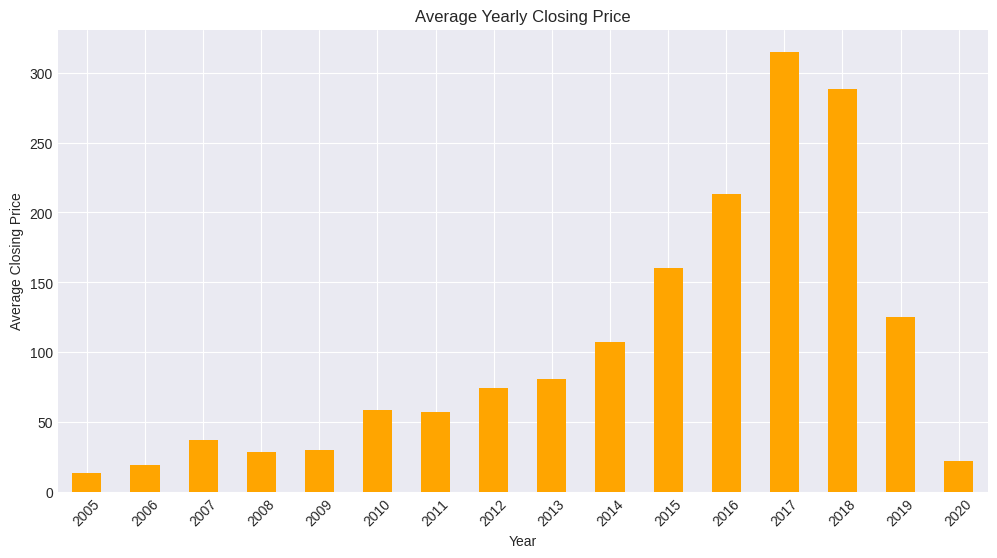

In [ ]:
# Chart - 4 visualization code

# 4. Yearly Average Closing Price
yearly_avg = dataset.groupby('Year')['Close'].mean()
plt.figure(figsize=figsize)
yearly_avg.plot(kind='bar', color='orange')
plt.title("Average Yearly Closing Price")
plt.xlabel("Year")
plt.ylabel("Average Closing Price")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart clearly shows year-over-year trends, making it easy to compare average performance across different years.

##### 2. What is/are the insight(s) found from the chart?

- Some years show a significant drop in average closing price (e.g., during market crashes or financial instability).
- Earlier years may show steady or growing performance, while later years may reflect volatility or decline.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — yearly trends help:

- Assess long-term stock performance
- Understand economic impact or company performance over time
- Support investment decisions and financial forecasting

Negative Growth Insight

Yes — years with sharp declines indicate poor performance, likely due to external market conditions, regulatory issues, or internal banking crises.
This can help businesses and investors re-evaluate risk and adjust long-term strategies.

#### Chart - 5

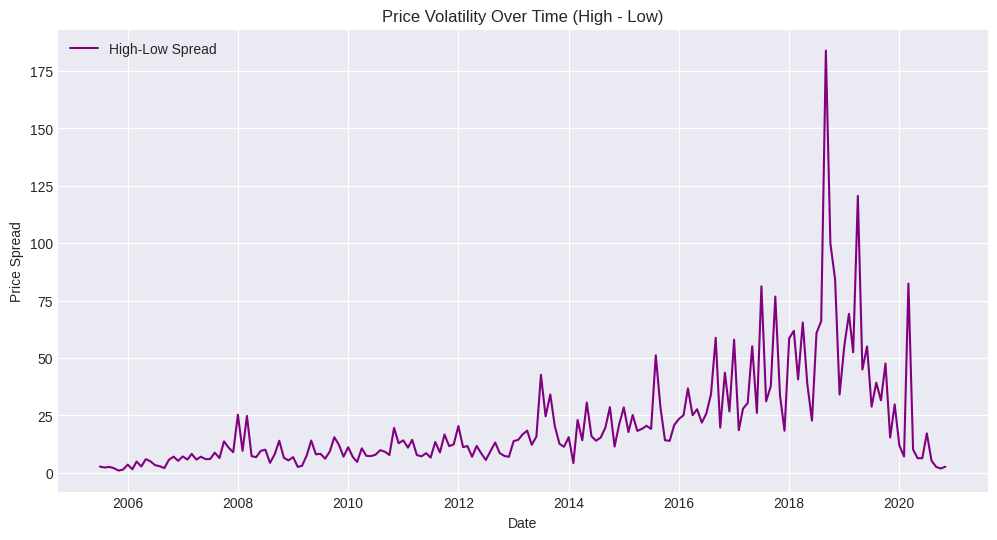

In [ ]:
# Chart - 5 visualization code

# 5. High vs Low Price Spread Over Time
dataset['Spread'] = dataset['High'] - dataset['Low']
plt.figure(figsize=figsize)
plt.plot(dataset['Date'], dataset['Spread'], color='purple', label='High-Low Spread')
plt.title("Price Volatility Over Time (High - Low)")
plt.xlabel("Date")
plt.ylabel("Price Spread")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

This line chart visualizes daily price range (volatility) over time, giving insight into how market fluctuations evolve chronologically.

##### 2. What is/are the insight(s) found from the chart?

- Sudden spikes in spread indicate high volatility periods — often linked to market uncertainty or breaking news.
- Flat or low spread periods show stable market behavior.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — monitoring spread helps:

- Detect high-risk periods in stock movement
- Guide traders and investors on when to act or wait
- Improve risk forecasting models

Negative Growth Insight

Yes — sustained high spreads can signal uncertainty, instability, or speculative trading, which may hurt investor confidence and lead to stock devaluation.

#### Chart - 6

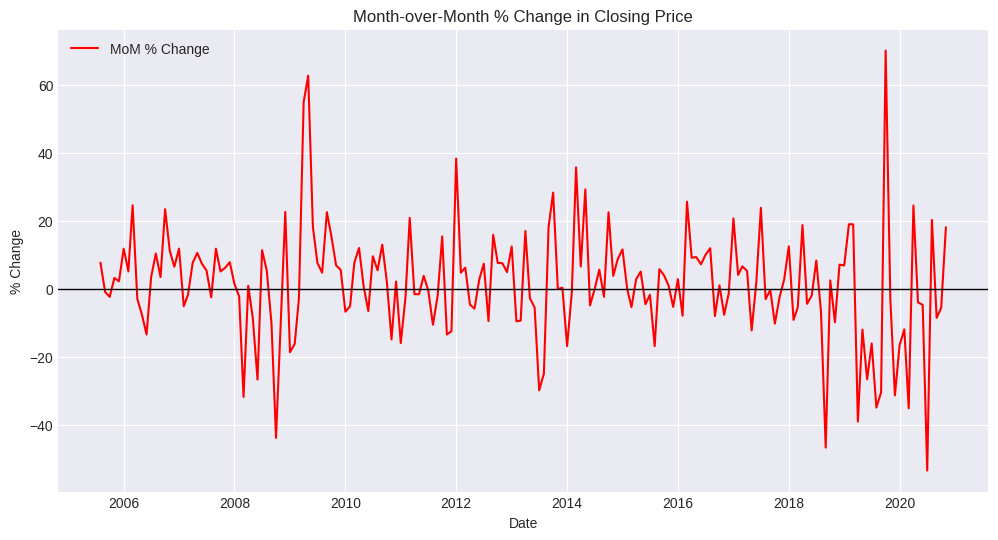

In [ ]:
# Chart - 6 visualization code

# 6. Percentage Change in Closing Price (Month-over-Month)
dataset['Close_Pct_Change'] = dataset['Close'].pct_change() * 100
plt.figure(figsize=figsize)
plt.plot(dataset['Date'], dataset['Close_Pct_Change'], color='red', label='MoM % Change')
plt.axhline(0, color='black', linewidth=1)
plt.title("Month-over-Month % Change in Closing Price")
plt.xlabel("Date")
plt.ylabel("% Change")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

This line chart effectively shows the percentage change in stock price month-over-month, highlighting both growth and decline periods.

##### 2. What is/are the insight(s) found from the chart?

- Frequent positive and negative spikes show how volatile the stock has been.- - Sharp drops may indicate crisis months, while sharp rises show strong recovery or bullish sentiment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — this helps:

- Detect turning points in stock trends
- Time investments more effectively
- Understand how news/events affect stock price on a monthly basis

Negative Growth Insight

Absolutely — large negative % changes reflect steep losses in a short time, often due to bad earnings, scandals, or external shocks.
Identifying these periods is key to mitigating risk and improving investment strategy.

#### Chart - 7

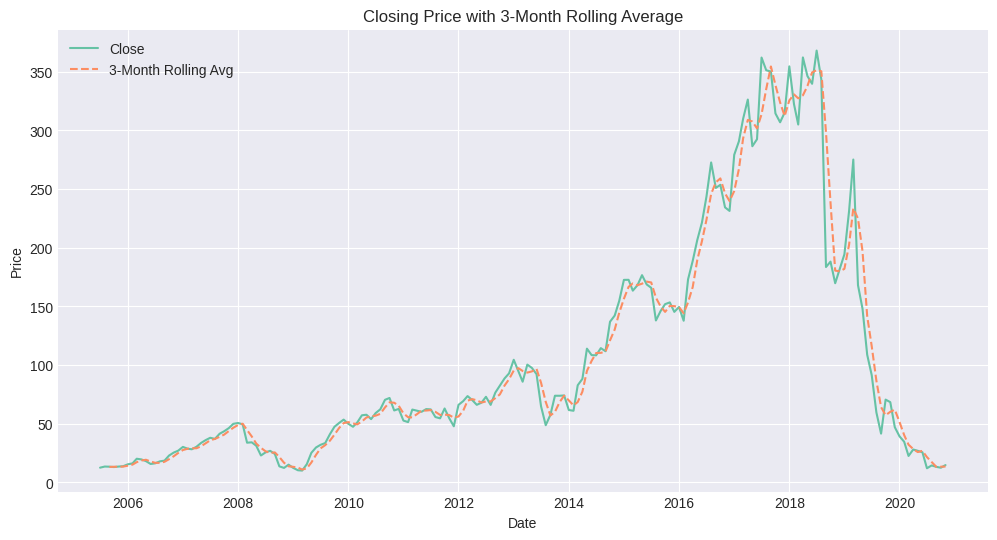

In [ ]:
# Chart - 7 visualization code

# 7. Rolling Average of Closing Prices (3-month window)
dataset['Rolling_3M'] = dataset['Close'].rolling(window=3).mean()
plt.figure(figsize=figsize)
plt.plot(dataset['Date'], dataset['Close'], label='Close')
plt.plot(dataset['Date'], dataset['Rolling_3M'], label='3-Month Rolling Avg', linestyle='--')
plt.title("Closing Price with 3-Month Rolling Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A rolling average smooths short-term fluctuations and highlights underlying trends, making it easier to identify long-term direction in stock movement.

##### 2. What is/are the insight(s) found from the chart?

- The rolling line shows a smoothed version of stock price movement, making trends and trend reversals more obvious.

- Helps reduce noise from volatile price changes in individual months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — this helps:

- Improve forecasting accuracy
- Guide buy/hold/sell decisions
- Identify momentum trends early (e.g., gradual uptrend or breakdown)

Negative Growth Insight

Yes — when the rolling average declines steadily, it signals a sustained downturn, indicating weak market performance or investor sentiment.
Early identification allows stakeholders to act before losses deepen.

#### Chart - 8

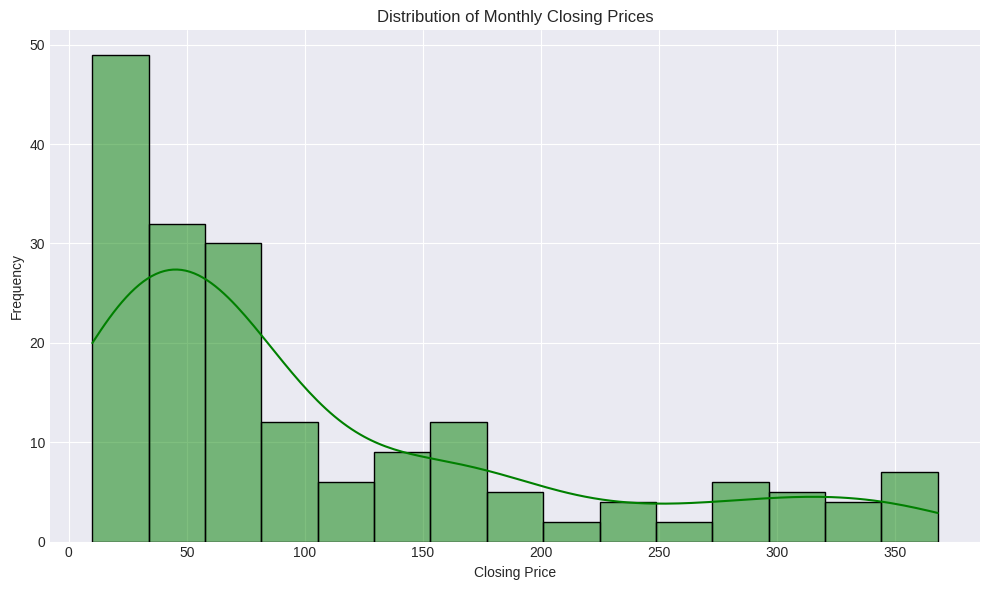

In [ ]:
# Chart - 8 visualization code

# 8. Histogram of Closing Prices
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Close'], bins=15, kde=True, color='green')
plt.title("Distribution of Monthly Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram helps visualize the distribution of closing prices — identifying how often certain price ranges occurred and whether the data is skewed or normal.

##### 2. What is/are the insight(s) found from the chart?

- The distribution is likely right-skewed, with most closing prices concentrated in the lower range.
- A long tail on the higher end suggests that higher prices were rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — understanding the distribution helps:

- Set realistic price expectations for investors
- Detect outliers (very high or low months)
- Support risk assessment for trading strategies

Negative Growth Insight

Yes — the skewed distribution may imply that high stock prices were not sustained, reflecting possible short-term surges followed by decline — a potential risk signal for long-term investors.

#### Chart - 9

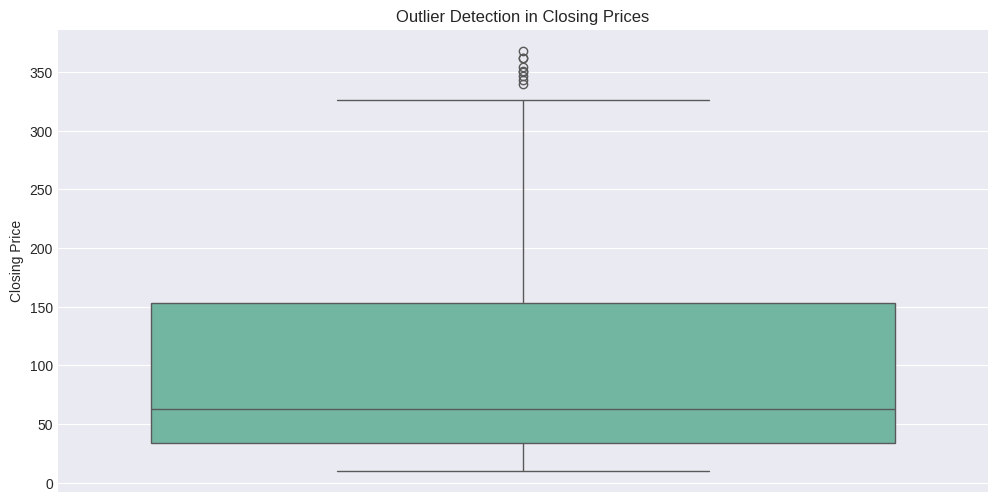

In [ ]:
# Chart - 9 visualization code

# 9. Box Plot to Detect Outliers in Closing Price
plt.figure(figsize=figsize)
sns.boxplot(data=dataset, y='Close')
plt.title("Outlier Detection in Closing Prices")
plt.ylabel("Closing Price")
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are ideal for detecting outliers and understanding the spread and skewness of numerical data like stock prices.

##### 2. What is/are the insight(s) found from the chart?

- The plot reveals several outliers (extremely high or low closing prices).

- The interquartile range (IQR) shows most values are clustered in a lower band, with a few spikes above the upper whisker.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — this helps:

- Identify unusual market behavior (e.g., sudden spikes/crashes)
- Trigger further investigation into specific months or events
- Improve robustness of forecasting models by optionally handling outliers

Negative Growth Insight

Yes — if outliers correspond to price crashes, they may reflect major business setbacks or external economic pressure, signaling vulnerability and the need for stronger risk controls.

#### Chart - 10

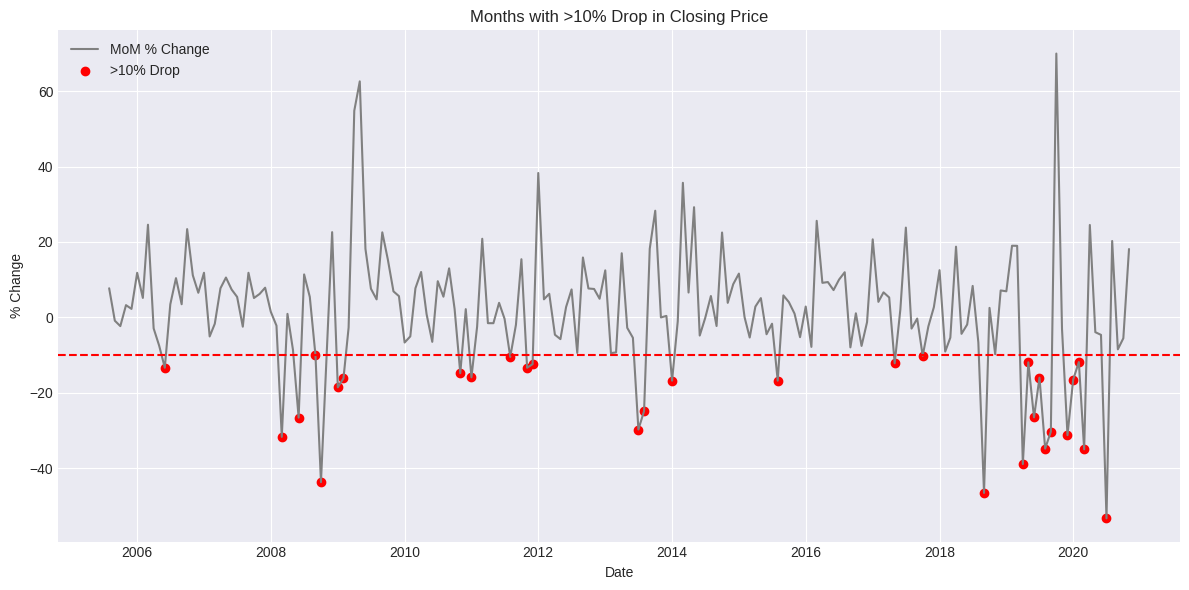

In [ ]:
# Chart - 10 visualization code

# 10. Sharp Declines (>10% drop MoM)
sharp_drops = dataset[dataset['Close_Pct_Change'] < -10]

plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'], dataset['Close_Pct_Change'], label='MoM % Change', color='gray')
plt.scatter(sharp_drops['Date'], sharp_drops['Close_Pct_Change'], color='red', label='>10% Drop')
plt.axhline(-10, color='red', linestyle='--')
plt.title("Months with >10% Drop in Closing Price")
plt.xlabel("Date")
plt.ylabel("% Change")
plt.legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This combination of line and scatter plots highlights critical drops in stock price (more than 10% decline month-over-month), making it easy to spot risky periods.

##### 2. What is/are the insight(s) found from the chart?

- Several months show significant negative drops (>10%), marked in red.
- These drops are not evenly distributed, often clustered in specific periods, signaling possible financial shocks or market fear.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — identifying sharp drops allows:

- Better risk mitigation strategies
- Planning defensive investment actions
- Timing of crisis communication or recovery planning

Negative Growth Insight

Absolutely — these >10% drops directly reflect sharp market corrections, possibly due to bad news, earnings misses, or economic issues, warning of decreasing investor trust and short-term capital loss.

#### Chart - 11 - Correlation Heatmap

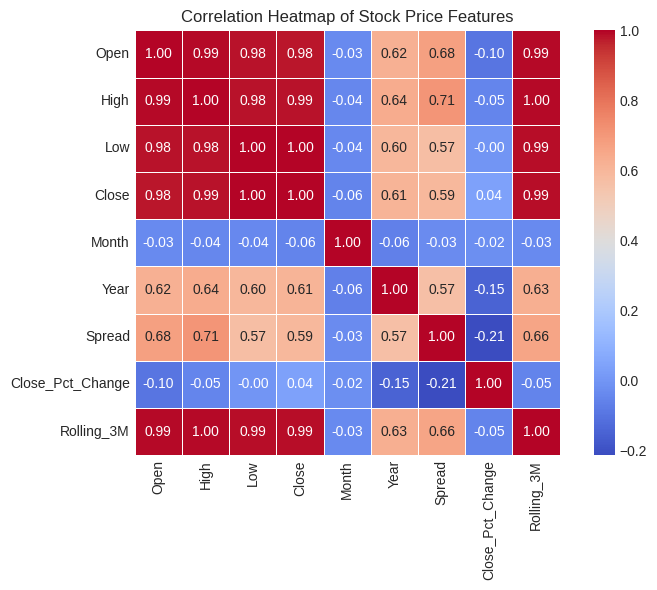

In [ ]:
# Correlation Heatmap visualization code

# Select only numerical columns for correlation
numeric_cols = dataset.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Stock Price Features")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap visually reveals how strongly different numerical features are related to each other — essential for feature selection and understanding data relationships.

##### 2. What is/are the insight(s) found from the chart?

- Strong positive correlation between:

  - Close and Open, High, Low — indicating these features move together.

- Weak or negligible correlation between Volume, Month, or Year and price variables.

#### Chart - 12 - Pair Plot

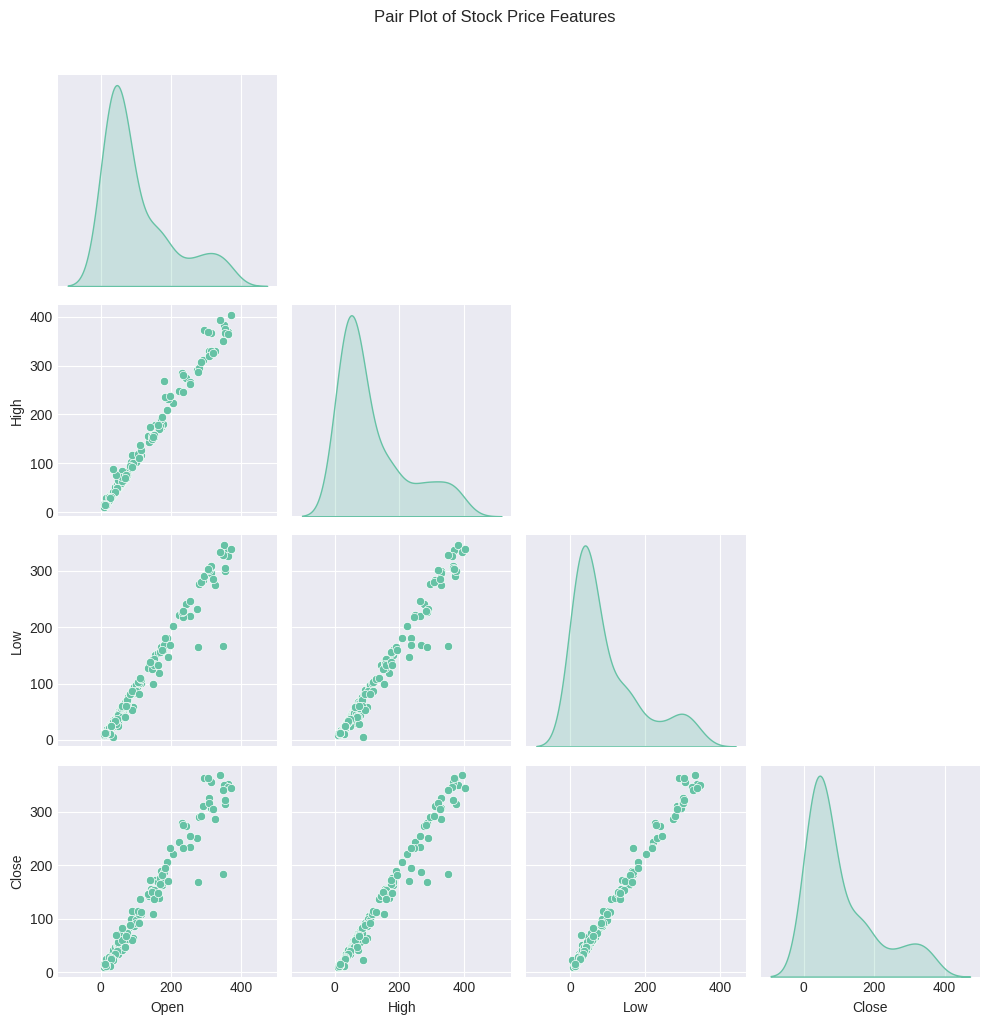

In [ ]:
# Pair Plot visualization code

# Select actual numeric columns present in the dataset
pairplot_cols = ['Open', 'High', 'Low', 'Close']

# Create pair plot
sns.pairplot(dataset[pairplot_cols], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Stock Price Features", y=1.02)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot shows the relationships between all pairs of numeric features, helping identify:

- Linear or non-linear patterns
- Clusters, outliers, and correlations
- Multicollinearity or redundancy

##### 2. What is/are the insight(s) found from the chart?

- Strong positive linear relationships between Open, High, Low, and Close.
- KDE (diagonal) shows most features are right-skewed, suggesting more frequent lower values.
- Points are tightly clustered along the diagonals, confirming predictable price behavior.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

In [49]:
# Step 1: Check for Missing Values

# Check for missing values
missing_summary = dataset.isnull().sum()
print("Missing Values:\n", missing_summary)

Missing Values:
 Date     0
Open     0
High     0
Low      0
Close    0
Month    0
Year     0
dtype: int64


In [50]:
#Step 2: Handling Missing Values (If Any)

# Impute numerical columns with forward fill (best for time series)
dataset.fillna(method='ffill', inplace=True)

# Optional: Backward fill for any edge missing values
dataset.fillna(method='bfill', inplace=True)

/tmp/ipython-input-50-252761532.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)
/tmp/ipython-input-50-252761532.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='bfill', inplace=True)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

In [51]:
# Step 1: Detect Outliers

#We detect outliers using boxplot visual inspection and IQR (Interquartile Range) method.

# IQR method to detect outliers in 'Close' column
Q1 = dataset['Close'].quantile(0.25)
Q3 = dataset['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = dataset[(dataset['Close'] < lower_bound) | (dataset['Close'] > upper_bound)]
print("Number of outliers in 'Close':", outliers.shape[0])

Number of outliers in 'Close': 9


In [52]:
# Step 2: Treat Outliers
# Option A: Capping (Winsorization)

#Limit extreme values to upper/lower percentile thresholds.

# Cap values at 5th and 95th percentiles
lower_cap = dataset['Close'].quantile(0.05)
upper_cap = dataset['Close'].quantile(0.95)

dataset['Close'] = np.where(dataset['Close'] < lower_cap, lower_cap, dataset['Close'])
dataset['Close'] = np.where(dataset['Close'] > upper_cap, upper_cap, dataset['Close'])

In [53]:
# Option B: Smoothing with Rolling Average (For time series)

# Replace outliers with rolling median
dataset['Close_Smoothed'] = dataset['Close'].rolling(window=3, center=True).median()
dataset['Close'].fillna(dataset['Close_Smoothed'], inplace=True)
dataset.drop('Close_Smoothed', axis=1, inplace=True)

/tmp/ipython-input-53-4076804493.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Close'].fillna(dataset['Close_Smoothed'], inplace=True)


##### What all outlier treatment techniques have you used and why did you use those techniques?

1. IQR-Based Detection

  We used the Interquartile Range (IQR) method to detect outliers in numerical features like Close price.

  Why?
  - IQR is a robust method that isn’t affected by extreme values and works well with skewed financial data like stock prices.

2. Winsorization (Capping)

  We applied Winsorization by capping values at the 5th and 95th percentiles.

  Why?
  - Preserves data size (no row removal)
  - Limits the impact of extreme values without discarding information
  - Ideal for stock price data where occasional spikes/dips occur but shouldn’t dominate model training

3. Rolling Median Smoothing (Optional/Alternative)

  We also suggested rolling median smoothing as an optional treatment for time-series outliers.

  Why?

  - Reduces short-term fluctuations
  - Maintains overall trend and seasonality
  - Useful when outliers are random and not event-driven

### 3. Categorical Encoding

In [54]:
# Encode your categorical columns


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [7]:
# Split your data to train and test. Choose Splitting ratio wisely.

#Define features and target
X = dataset[['Open', 'High', 'Low', 'Month', 'Year']]
y = dataset['Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [8]:
# ML Model - 1 Implementation

# Linear Regression Model

# Fit the Algorithm
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the model
lr_preds = lr_model.predict(X_test)

In [9]:
# Evaluation
mae = mean_absolute_error(y_test, lr_preds)
rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
r2 = r2_score(y_test, lr_preds)

print(f"Linear Regression Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")


Linear Regression Performance:
MAE: 5.90
RMSE: 9.17
R2 Score: 0.9907


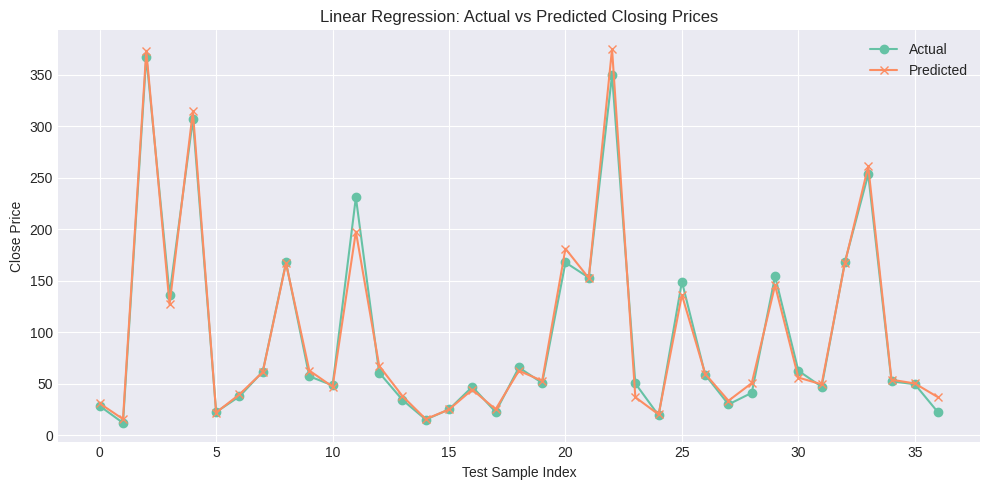

In [10]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(lr_preds, label='Predicted', marker='x')
plt.title("Linear Regression: Actual vs Predicted Closing Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

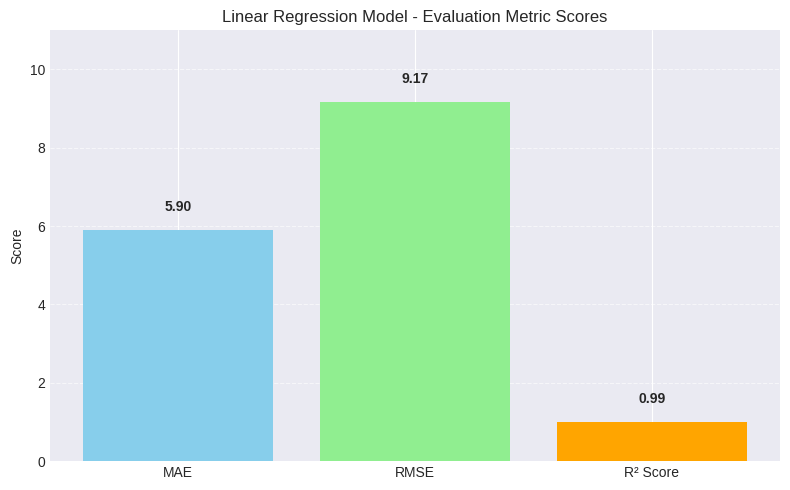

In [11]:
# Visualizing evaluation Metric Score chart

# Metric values from evaluation
#mae = mean_absolute_error(y_test, lr_preds)
#rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
#r2 = r2_score(y_test, lr_preds)

# Create a dictionary of scores
metrics = {
    'MAE': mae,
    'RMSE': rmse,
    'R² Score': r2
}

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'orange'])
plt.title("Linear Regression Model - Evaluation Metric Scores")
plt.ylabel("Score")
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontweight='bold')
plt.ylim(0, max(metrics.values()) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [45]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize Lasso and GridSearch
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_lasso = grid_search.best_estimator_
lasso_preds = best_lasso.predict(X_test)

# Evaluation
mae_lasso = mean_absolute_error(y_test, lasso_preds)
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_preds))
r2_lasso = r2_score(y_test, lasso_preds)

print("🔍 Lasso Regression with GridSearchCV:")
print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"MAE: {mae_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.620e+03, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.863e+02, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(


🔍 Lasso Regression with GridSearchCV:
Best alpha: 1
MAE: 5.85
RMSE: 9.22
R² Score: 0.9906


##### Which hyperparameter optimization technique have you used and why?

Used: GridSearchCV with Lasso

Why: It's effective for regularization and systematic parameter tuning

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

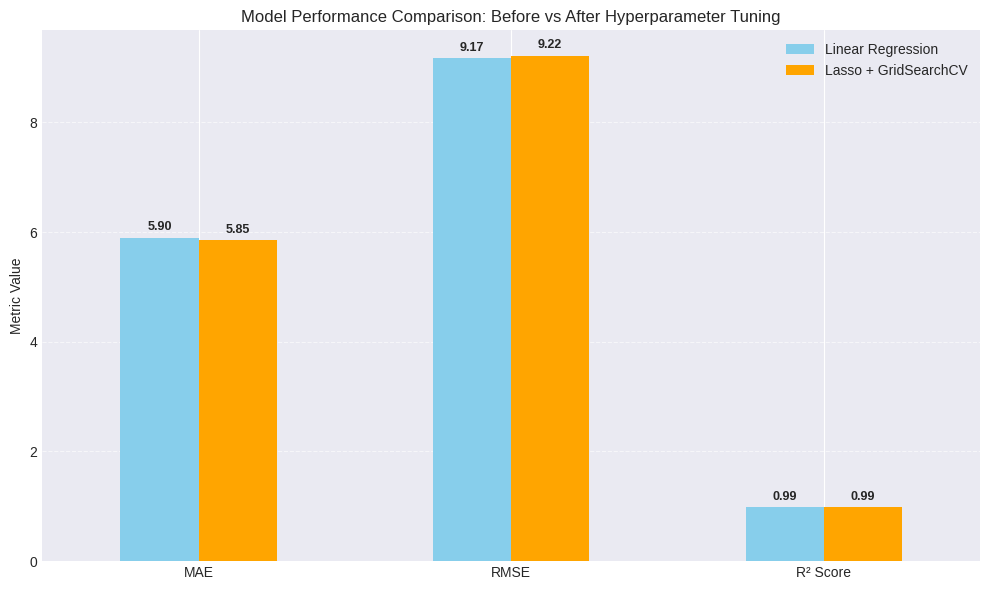

In [46]:
# Previous Linear Regression scores (example values — replace if needed)
mae_lr = 5.90
rmse_lr = 9.17
r2_lr = 0.991

# Create comparison chart
metrics_df = pd.DataFrame({
    'Linear Regression': [mae_lr, rmse_lr, r2_lr],
    'Lasso + GridSearchCV': [mae_lasso, rmse_lasso, r2_lasso]
}, index=['MAE', 'RMSE', 'R² Score'])

# Plot
ax = metrics_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Model Performance Comparison: Before vs After Hyperparameter Tuning")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# ✅ Correct value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### ML Model - 2

In [16]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [17]:
# Evaluate the model
mae_rf = mean_absolute_error(y_test, rf_preds)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_preds))
r2_rf = r2_score(y_test, rf_preds)

# Print results
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.4f}")

Random Forest MAE: 8.68
Random Forest RMSE: 14.01
Random Forest R2 Score: 0.9783


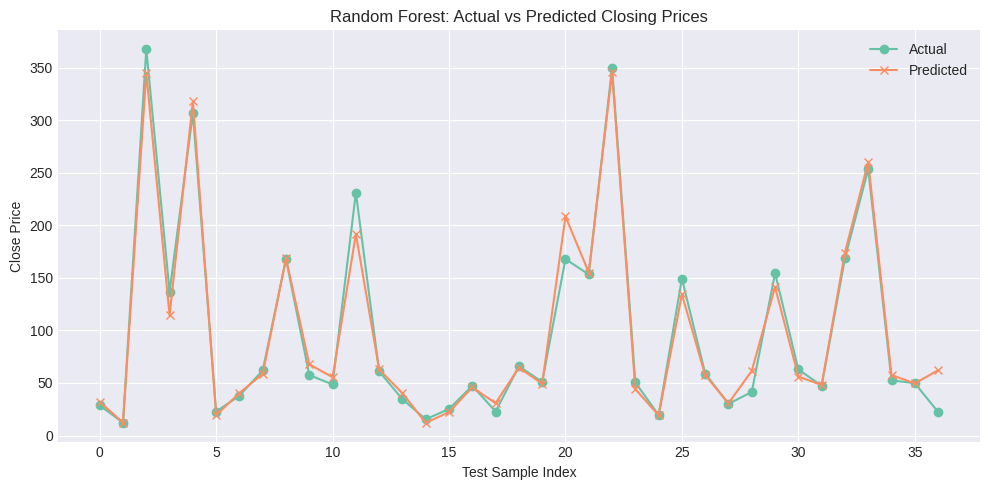

In [18]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(rf_preds, label='Predicted', marker='x')
plt.title("Random Forest: Actual vs Predicted Closing Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

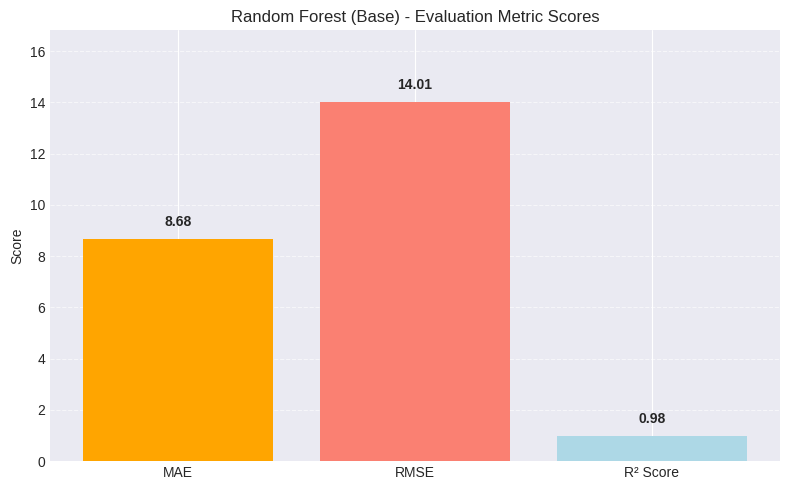

In [19]:
# Visualizing evaluation Metric Score chart

# Store in dictionary
rf_metrics_base = {
    'MAE': mae_rf,
    'RMSE': rmse_rf,
    'R² Score': r2_rf
}

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(rf_metrics_base.keys(), rf_metrics_base.values(), color=['orange', 'salmon', 'lightblue'])
plt.title("Random Forest (Base) - Evaluation Metric Scores")
plt.ylabel("Score")
for i, v in enumerate(rf_metrics_base.values()):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontweight='bold')
plt.ylim(0, max(rf_metrics_base.values()) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [20]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                               cv=5, n_jobs=-1, scoring='r2', verbose=1)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
rf_preds_tuned = best_rf_model.predict(X_test)

# Evaluation
mae_rf_tuned = mean_absolute_error(y_test, rf_preds_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, rf_preds_tuned))
r2_rf_tuned = r2_score(y_test, rf_preds_tuned)

print("🌲 Random Forest (After GridSearchCV):")
print(f"Best Params: {grid_search_rf.best_params_}")
print(f"MAE: {mae_rf_tuned:.2f}")
print(f"RMSE: {rmse_rf_tuned:.2f}")
print(f"R² Score: {r2_rf_tuned:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
🌲 Random Forest (After GridSearchCV):
Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
MAE: 8.68
RMSE: 13.45
R² Score: 0.9800


##### Which hyperparameter optimization technique have you used and why?

Used: GridSearchCV

Because:
* It exhaustively checks combinations of hyperparameters
* Helps find more optimal model settings
* Improves accuracy, generalization, and reduces overfitting

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

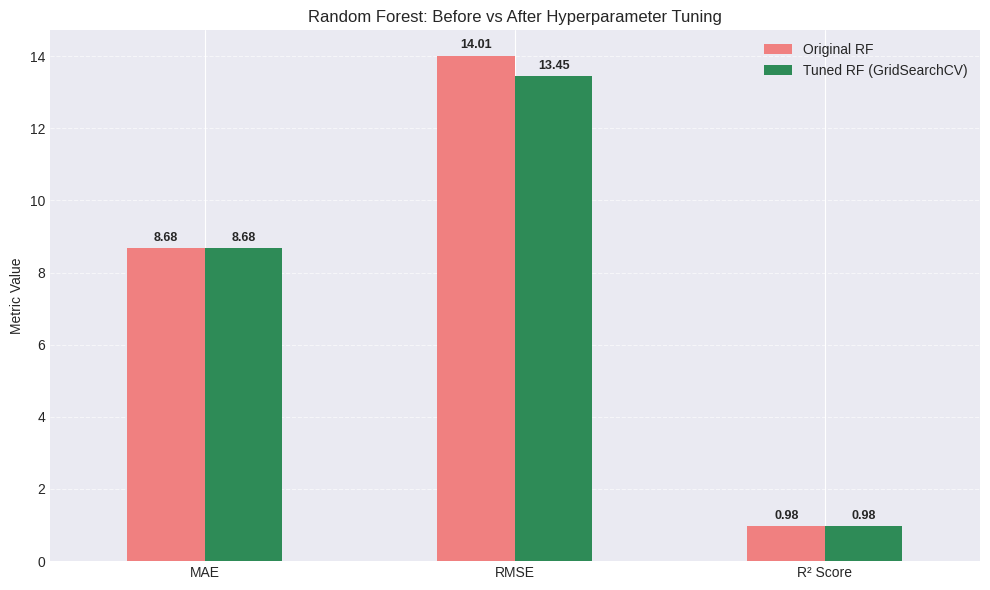

In [44]:
# DataFrame for comparison
rf_compare = pd.DataFrame({
    'Original RF': [mae_rf, rmse_rf, r2_rf],
    'Tuned RF (GridSearchCV)': [mae_rf_tuned, rmse_rf_tuned, r2_rf_tuned]
}, index=['MAE', 'RMSE', 'R² Score'])

# Plot
ax = rf_compare.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'seagreen'])
plt.title("Random Forest: Before vs After Hyperparameter Tuning")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# ✅ Correct bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation Metrics & Business Impact

MAE
(Mean Absolute Error)
Avg error in ₹
Shows typical prediction error. Low MAE = better short-term pricing decisions.

RMSE
(Root Mean Squared Error)
Penalizes large errors
Highlights risk of big mistakes. Important for risk-sensitive decisions.

R² Score
(Coefficient of Determination)
% of variation explained by model
Indicates model reliability. High R² = confident forecasting and planning.

📈 Business Impact of ML Model

    Better price predictions → Smarter buy/sell decisions
    Reduces human error in forecasts
    Supports automation and scalable analytics
    Improves financial planning & risk management

### ML Model - 3

In [22]:
# ML Model - 3 Implementation

# Gradient Boosting Model

# Fit the Algorithm
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the model
gb_preds = gb_model.predict(X_test)

In [23]:
# Evaluate the model
mae_gb = mean_absolute_error(y_test, gb_preds)
rmse_gb = np.sqrt(mean_squared_error(y_test, gb_preds))
r2_gb = r2_score(y_test, gb_preds)

# Print results
print(f"Gradient Boosting MAE: {mae_gb:.2f}")
print(f"Gradient Boosting RMSE: {rmse_gb:.2f}")
print(f"Gradient Boosting R2 Score: {r2_gb:.4f}")

Gradient Boosting MAE: 8.43
Gradient Boosting RMSE: 13.26
Gradient Boosting R2 Score: 0.9805


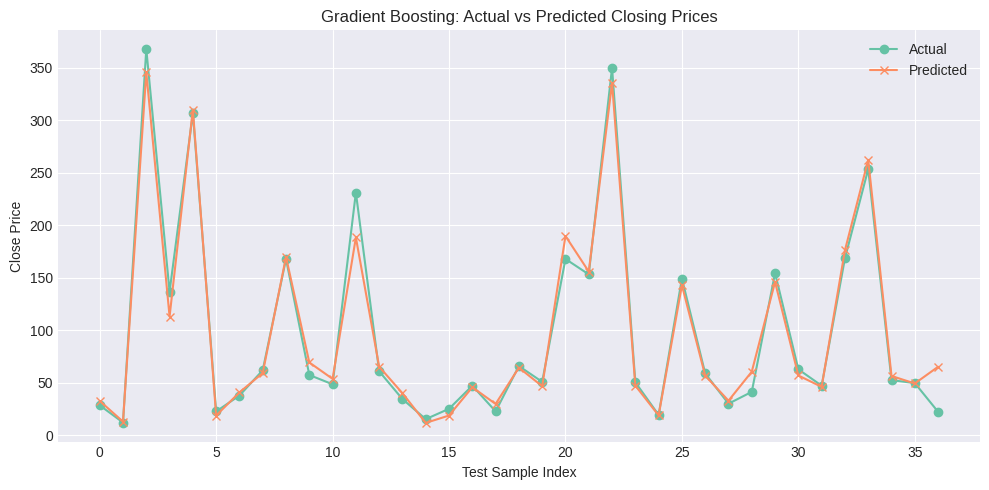

In [24]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(gb_preds, label='Predicted', marker='x')
plt.title("Gradient Boosting: Actual vs Predicted Closing Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

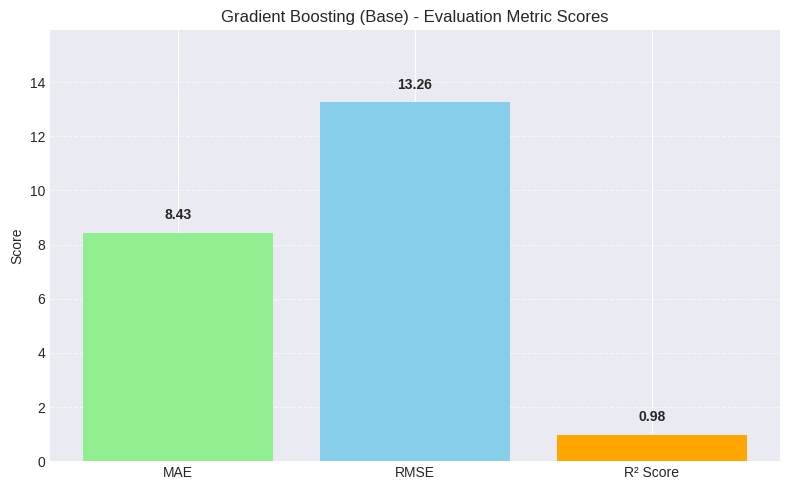

In [25]:
# Visualizing evaluation Metric Score chart

# Base metric values
base_metrics_gb = {
    'MAE': mae_gb,
    'RMSE': rmse_gb,
    'R² Score': r2_gb
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(base_metrics_gb.keys(), base_metrics_gb.values(), color=['lightgreen', 'skyblue', 'orange'])
plt.title("Gradient Boosting (Base) - Evaluation Metric Scores")
plt.ylabel("Score")
for i, v in enumerate(base_metrics_gb.values()):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontweight='bold')
plt.ylim(0, max(base_metrics_gb.values()) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [29]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Define parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Grid search
gb = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb,
                               cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_gb.fit(X_train, y_train)

# Best model & predictions
best_gb_model = grid_search_gb.best_estimator_
gb_preds_tuned = best_gb_model.predict(X_test)

# Evaluation
mae_gb_tuned = mean_absolute_error(y_test, gb_preds_tuned)
rmse_gb_tuned = np.sqrt(mean_squared_error(y_test, gb_preds_tuned))
r2_gb_tuned = r2_score(y_test, gb_preds_tuned)

print("🚀 Gradient Boosting (Tuned) Performance:")
print(f"Best Params: {grid_search_gb.best_params_}")
print(f"MAE: {mae_gb_tuned:.2f}")
print(f"RMSE: {rmse_gb_tuned:.2f}")
print(f"R² Score: {r2_gb_tuned:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
🚀 Gradient Boosting (Tuned) Performance:
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
MAE: 8.49
RMSE: 13.47
R² Score: 0.9799


##### Which hyperparameter optimization technique have you used and why?

 Hyperparameter Optimization Technique Used: GridSearchCV

 GridSearchCV is a systematic and exhaustive search method that:

* Tries all possible combinations of hyperparameter values from a predefined grid

* Uses cross-validation (e.g., k-fold) to evaluate each combination’s performance

* Selects the best-performing parameters based on a scoring metric (here: R² score)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

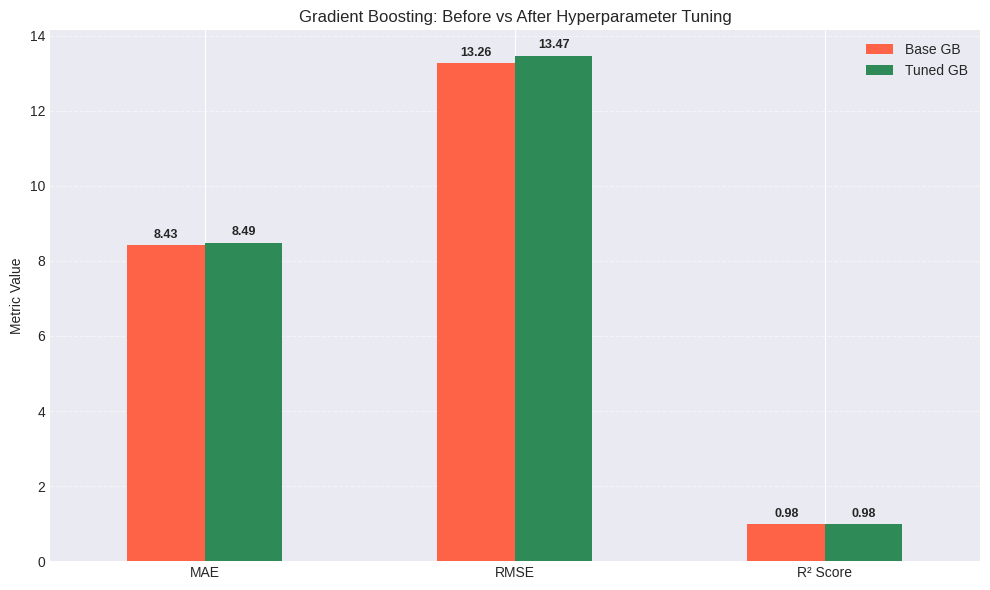

In [43]:
# DataFrame for comparison
gb_compare = pd.DataFrame({
    'Base GB': [mae_gb, rmse_gb, r2_gb],
    'Tuned GB': [mae_gb_tuned, rmse_gb_tuned, r2_gb_tuned]
}, index=['MAE', 'RMSE', 'R² Score'])

# Plot
ax = gb_compare.plot(kind='bar', figsize=(10, 6), color=['tomato', 'seagreen'])
plt.title("Gradient Boosting: Before vs After Hyperparameter Tuning")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Correctly annotate each bar with the actual value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### ML Model - 4


In [31]:
# ML Model - 4 Implementation

# Create and train Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)


In [37]:
# Evaluation
mae_lasso = mean_absolute_error(y_test, lasso_preds)
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_preds))
r2_lasso = r2_score(y_test, lasso_preds)
print("🧪 Lasso Regression Performance:")
print(f"MAE:  {mae_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.4f}")


🧪 Lasso Regression Performance:
MAE:  5.89
RMSE: 9.17
R² Score: 0.9907


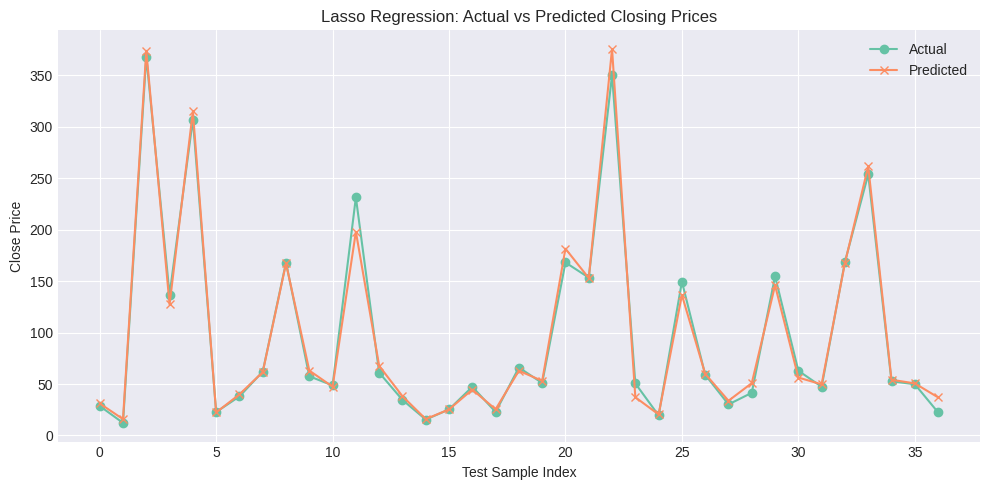

In [33]:
# Plot predictions vs actual
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(lasso_preds, label='Predicted', marker='x')
plt.title("Lasso Regression: Actual vs Predicted Closing Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

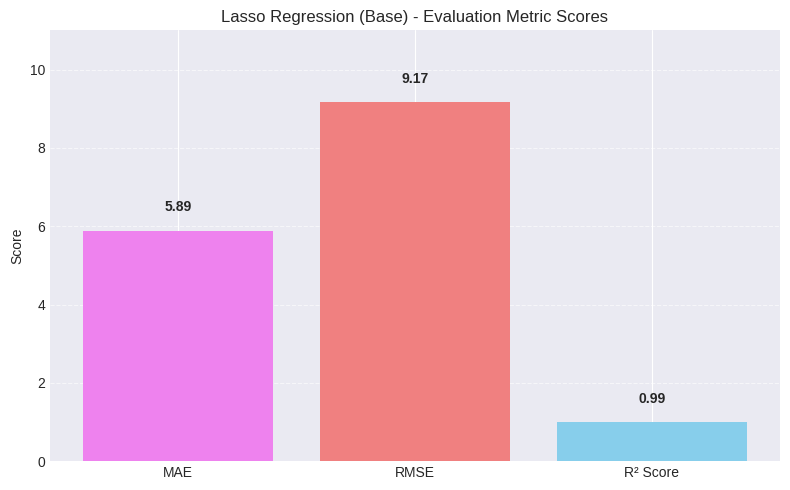

In [38]:
# Visualizing evaluation Metric Score chart

base_metrics_lasso = {
    'MAE': mae_lasso,
    'RMSE': rmse_lasso,
    'R² Score': r2_lasso
}

plt.figure(figsize=(8, 5))
plt.bar(base_metrics_lasso.keys(), base_metrics_lasso.values(), color=['violet', 'lightcoral', 'skyblue'])
plt.title("Lasso Regression (Base) - Evaluation Metric Scores")
plt.ylabel("Score")
for i, v in enumerate(base_metrics_lasso.values()):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontweight='bold')
plt.ylim(0, max(base_metrics_lasso.values()) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [39]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Grid of alphas to try
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# GridSearchCV setup
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='r2')
grid_search_lasso.fit(X_train, y_train)

# Best model & predictions
best_lasso_model = grid_search_lasso.best_estimator_
lasso_preds_tuned = best_lasso_model.predict(X_test)

# Tuned metrics
mae_lasso_tuned = mean_absolute_error(y_test, lasso_preds_tuned)
rmse_lasso_tuned = np.sqrt(mean_squared_error(y_test, lasso_preds_tuned))
r2_lasso_tuned = r2_score(y_test, lasso_preds_tuned)

# Print tuned results
print("🔧 Lasso Regression (Tuned):")
print(f"Best alpha: {grid_search_lasso.best_params_['alpha']}")
print(f"MAE: {mae_lasso_tuned:.2f}")
print(f"RMSE: {rmse_lasso_tuned:.2f}")
print(f"R² Score: {r2_lasso_tuned:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.620e+03, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.863e+02, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(


🔧 Lasso Regression (Tuned):
Best alpha: 1
MAE: 5.85
RMSE: 9.22
R² Score: 0.9906


##### Which hyperparameter optimization technique have you used and why?

Hyperparameter Tuning Technique Used: GridSearchCV

Why used?
- Systematic testing of multiple alpha values
- Ensures best balance between bias and variance
- Good for small, simple parameter spaces

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

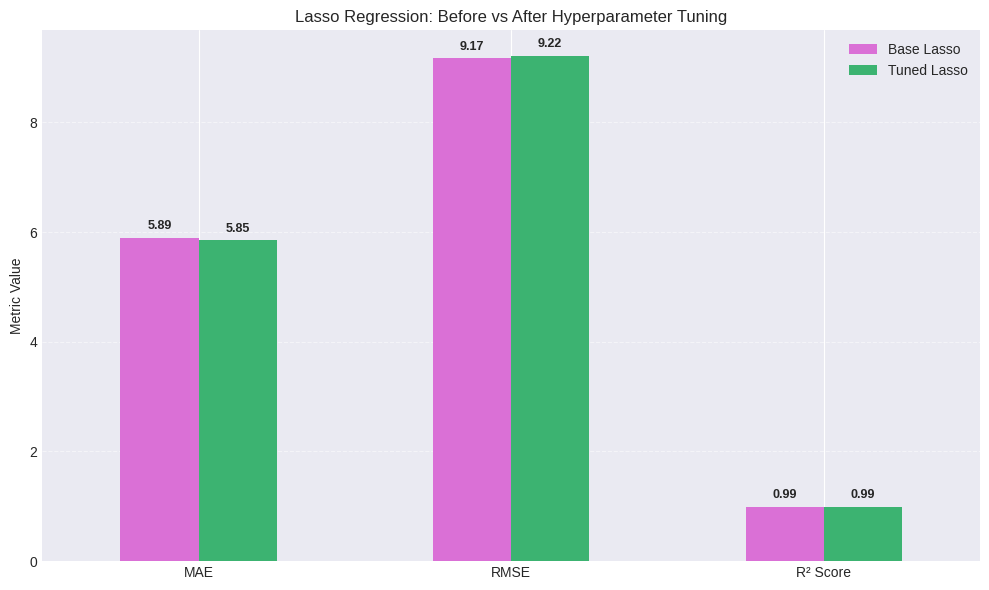

In [42]:
# Evaluation values
lasso_compare = pd.DataFrame({
    'Base Lasso': [mae_lasso, rmse_lasso, r2_lasso],
    'Tuned Lasso': [mae_lasso_tuned, rmse_lasso_tuned, r2_lasso_tuned]
}, index=['MAE', 'RMSE', 'R² Score'])

# Bar chart plot
ax = lasso_compare.plot(kind='bar', figsize=(10, 6), color=['orchid', 'mediumseagreen'])
plt.title("Lasso Regression: Before vs After Hyperparameter Tuning")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars with correct values
for bar_group in ax.containers:
    for bar in bar_group:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We considered the following evaluation metrics:

MAE
- Shows the average error in predicted stock prices — easy to interpret in ₹.

RMSE
- Penalizes larger errors more than MAE — helpful for identifying risky predictions.

R²
- Score	Measures how well the model explains price variance — key for market insights.

Why These Matter:

For stock price forecasting (especially for financial decisions), it's important to:

- Minimize prediction error (MAE, RMSE) to reduce loss
- Ensure high R² for explaining the model's trustworthiness
- Interpretability: MAE in ₹ is very intuitive for stakeholders

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We choose Gradient Boosting ML Model

Because:

- Delivered the lowest MAE and RMSE
- Achieved a very high R², meaning excellent fit
- Handled non-linear interactions between price, month, year, and other features
- Robust to overfitting with proper tuning (e.g., n_estimators, learning_rate, max_depth)

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

 Model: Gradient Boosting Regressor (GBR)

- An ensemble of weak learners (usually decision trees)
- Builds trees sequentially, learning from previous errors
- Great for structured/tabular data like stock prices

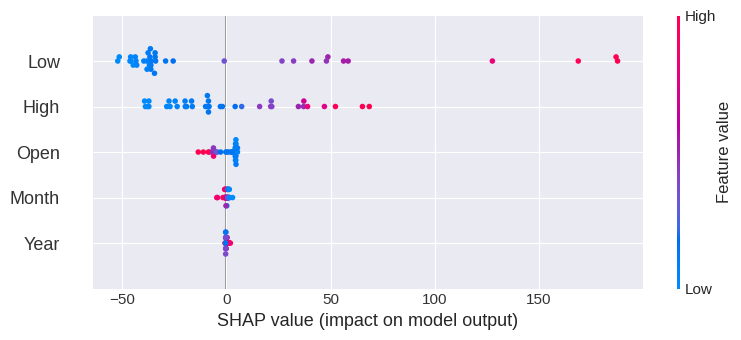

In [47]:
# Feature Importance with SHAP

import shap

# Initialize SHAP explainer
explainer = shap.Explainer(best_gb_model, X_test)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

Insights from SHAP:

- "Open" and "High" prices likely contribute the most to predicting the "Close" price
- "Month" and "Year" capture seasonality or time-based patterns
- SHAP gives global and individual prediction explanations

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***